# Real or Not? NLP with Disaster Tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print('Training Set Shape = {}'.format(train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(train.memory_usage().sum() / 1024**2))
print()
print('Test Set Shape = {}'.format(test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB

Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


# 1. EDA
This section will conduct some Exploratory Data Analysis (EDA) to gain a better understanding of the dataset.

In [3]:
# Training data
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


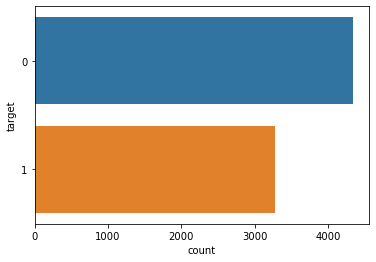

In [4]:
# Target label balance
sns.countplot(y=train['target'])

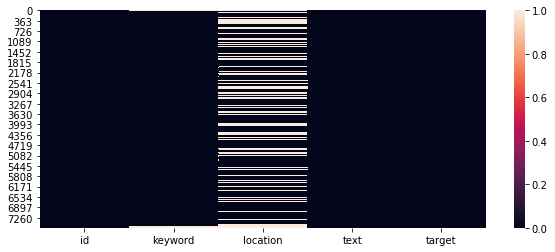

In [5]:
# Missing values
plt.figure(figsize=(10, 4))
sns.heatmap(train.isna())

Text(0.5, 1.0, 'Top 15 Keywords')

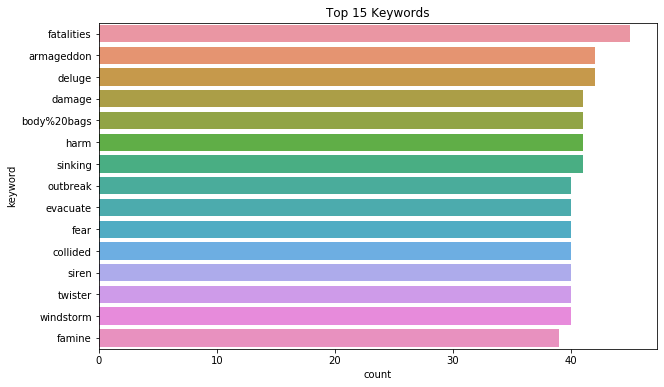

In [6]:
# Top keywords
plt.figure(figsize=(10, 6))
sns.countplot(y=train['keyword'], order=train['keyword'].value_counts().iloc[0:15].index)
plt.title("Top 15 Keywords")

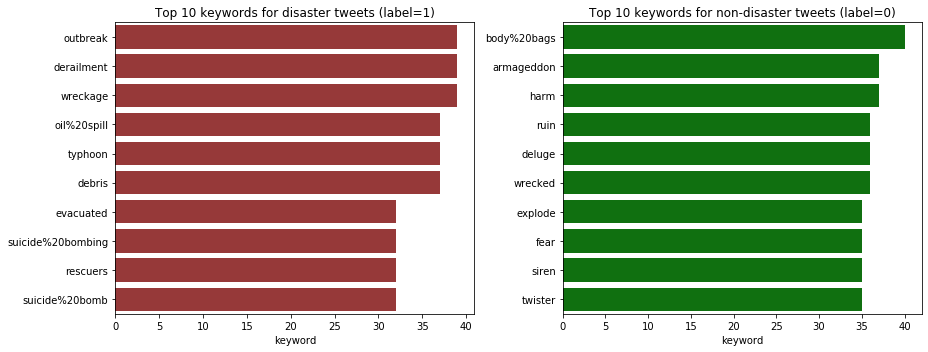

In [7]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(13,5))
# Disaster tweets
plt.subplot(121)
sns.barplot(x=kw_d, y=kw_d.index, color='brown')
plt.title('Top 10 keywords for disaster tweets (label=1)')
# Non-disaster tweets
plt.subplot(122)
sns.barplot(x=kw_nd, y=kw_nd.index, color='green')
plt.title('Top 10 keywords for non-disaster tweets (label=0)')

plt.tight_layout()

There seem to be no common keywords among disaster and non-disaster tweets.

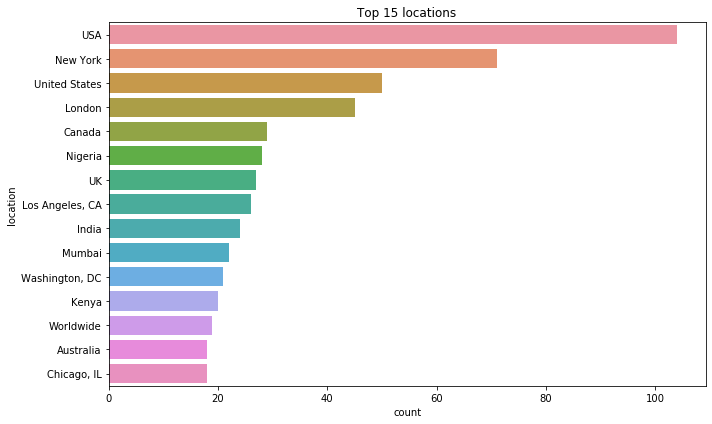

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y=train.location, order = train.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.tight_layout()